In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Part 1: Prepare the Data

In [2]:
# Reading in the data from the provided CSV
file_path = "Resources/myopia.csv"

In [3]:
# saving the data as a variable
myopia_df = pd.read_csv(file_path)
# printing first five lines dataframe 
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# removing column in order to switch to unsupervised machine learning, var will be called again for plotting prep 
unsupervised_df = myopia_df.drop("MYOPIC", axis=1)
# printing abbreviated version to display that myopic was successfully removed 
unsupervised_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
# Create SS instances,needed to ensure that columns higher-valued columns are not given preference...
scaler = StandardScaler()
# ... over features with lower thresholds 
scaled_data = scaler.fit_transform(unsupervised_df)

Part 2A: Apply Dimensionality Reduction

In [7]:
# Dimensionality reduction refers to reducing the number of input variables (columns/features) for a dataset
pca = PCA(n_components=0.9)
# consider columns as dimensions oin space space and the rows of data as points in that space
pca_transformed_data = pca.fit_transform(scaled_data)

In [8]:
# COME BACK TO EDIT THE CELL 

# Rather than specify the number of principal components when you instantiate the PCA model... 
# state the desired explained variance. 
# For example, say that a dataset has 100 features. 
# Using PCA(n_components=0.99) creates a model that willpreserve approximately 99% of the explained variance... 
# whether that means reducing the dataset to 80 principal components or 3.
# For this assignment, preserve 90% of the explained variance in dimensionality reduction.

In [9]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)
# Reduce dimensions
transformed_features = tsne.fit_transform(pca_transformed_data)

/Users/raycetimbes/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
# Checking that data set has 2 columns
transformed_features.shape

(618, 2)

Part 2b: Prepare to plot the dataset

In [14]:
# The first column of transformed features
unsupervised_df['x'] = transformed_features[:,0]

# The second column of transformed features
unsupervised_df['y'] = transformed_features[:,1]

#  variable needed to betterv isualize the results graph
unsupervised_df["class"] = myopia_df["MYOPIC"]

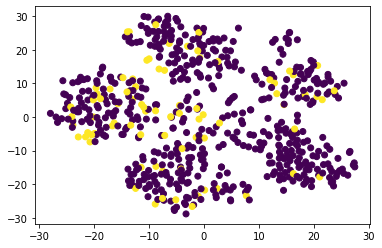

In [16]:
# Visualize the clusters using the class column df created in previous line of code 
plt.scatter(unsupervised_df['x'], unsupervised_df['y'], c=unsupervised_df["class"])

# print statement 
plt.show()

The two classes overlap quite a bit, so presence of clustering is unlikely.